# Docs during challenge

First some meta info: I started sunday morning at 10am. I hadn't seen my girl for 3 weeks and couldn't just sit on the PC all day instead of spending a late christmas day with her. Just FYI. I sent an email but I still think Florian just gets my emails in his spam folder...

## Pip vs conda

I am used to working with virtualenv and pip so I stuck with that. See the requirements.txt file. 
I also use python3.7

## Overall approach

I will follow these steps to approach the problem:

1. explore the dataset manually in jupyter
    - missing values
    - wrongly encoded values
    - categories vs continuous data
2. learn how pipelines work (I never used them) and set up an "empty shell", i.e. something that works in respect to the consuming code (`challenge.py`) but that doesn't do anything
3. extend the pipeline
    1. clean the data
    2. deal with categories
    3. add a simple decision tree as a benchmark
4. allow for parameters in regards to the classifier
    1. Allow for more than one classifier to be selectable when getting the pipeline
    2. deploy a range of commonly used classifiers
5. Different classifiers require different preprocessing
    1. parameterize the preprocessing to things like `one-hot` vs `categorical` and 
    2. maybe feature selection
6. Create the TF custom estimator (actually I'll use keras, because I'm not well versed in the tf API and I think I might only have 1 day instead of 2)
7. Compare all results in this notebook

---

## Data exploration

In [14]:
import challenge

In [15]:
df = challenge.get_dataset_as_df('train')

/home/pascalwhoop/Documents/Code/radix_challenge/challenge.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  na_values='?')


In [53]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earns_over_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [54]:
len(df)

32561

In [55]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

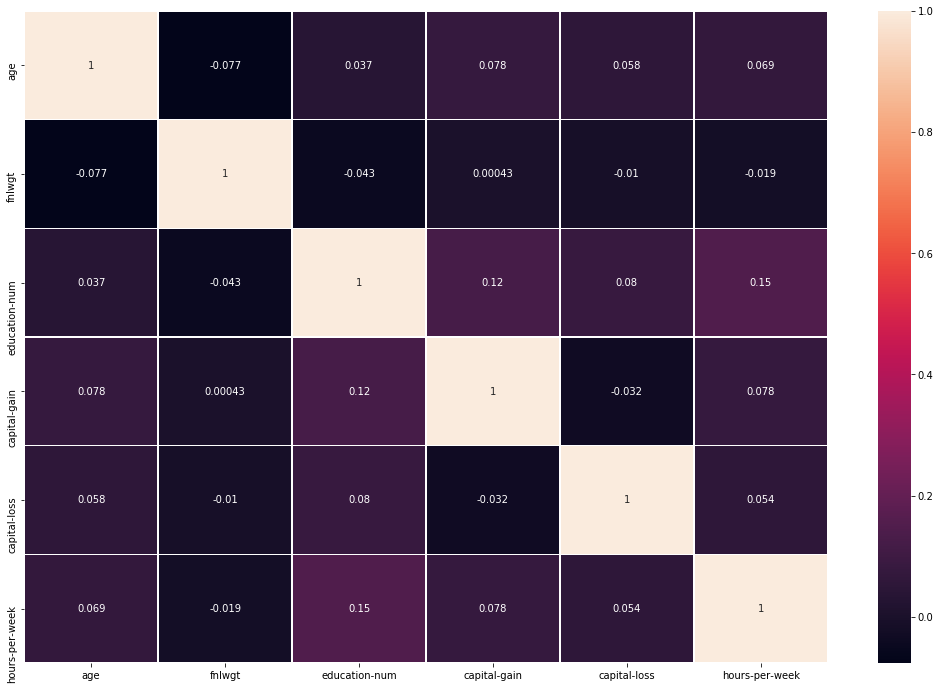

In [57]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

Okay, let's develop the preprocessing pipeline...

In [58]:
import sklearn.preprocessing as preprocessing

In [59]:
enc = preprocessing.OrdinalEncoder()
enc.fit(df)

ValueError: Input contains NaN

Okay lets find those NaNs to see how to deal with them

In [34]:
nulls = df.isnull()

In [35]:
nulls.sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
earns_over_50K       0
dtype: int64

The NaN get triggered by some of the string encoded values that I wanted to convert into a category. If I intend to encode them into a category, I need to deal with those. I could set them all to "unknown" which would then turn into its own category. Something like a decision tree algortihm would probably determine that this category value is of little information gain for the classifier and not use it. But I am unsure how other algorithms would be affected by an explicit value that is "wrong"

[sklearn also comes with a handy set of tools](https://scikit-learn.org/stable/modules/impute.html#impute) to deal with that. Since I need to build a pipeline, it's probably best if I do that. 

## Pipelines

Because I haven't worked with them yet, a quick primer:

In [36]:
from sklearn.impute import MissingIndicator
import numpy as np

In [37]:
indicator = MissingIndicator(missing_values=np.NaN)
>>> mask_missing_values_only = indicator.fit_transform(df)

ValueError: could not convert string to float: 'State-gov'

Okay. A marking is not possible with string encoded categories but a conversion of the strings to categories is not possible if there are NaN's. Then I'll manually map all NaN to a value, then to ints and then create a indicator table

In [39]:
df = df.fillna("unknown")

In [41]:
enc.fit(df)
df_transformed = enc.transform(df)

In [49]:
def get_df_back(data, df_mask):
    return pd.DataFrame(data, index=df_mask.index, columns=df_mask.columns)

In [61]:
df_transformed = get_df_back(df_transformed, df)

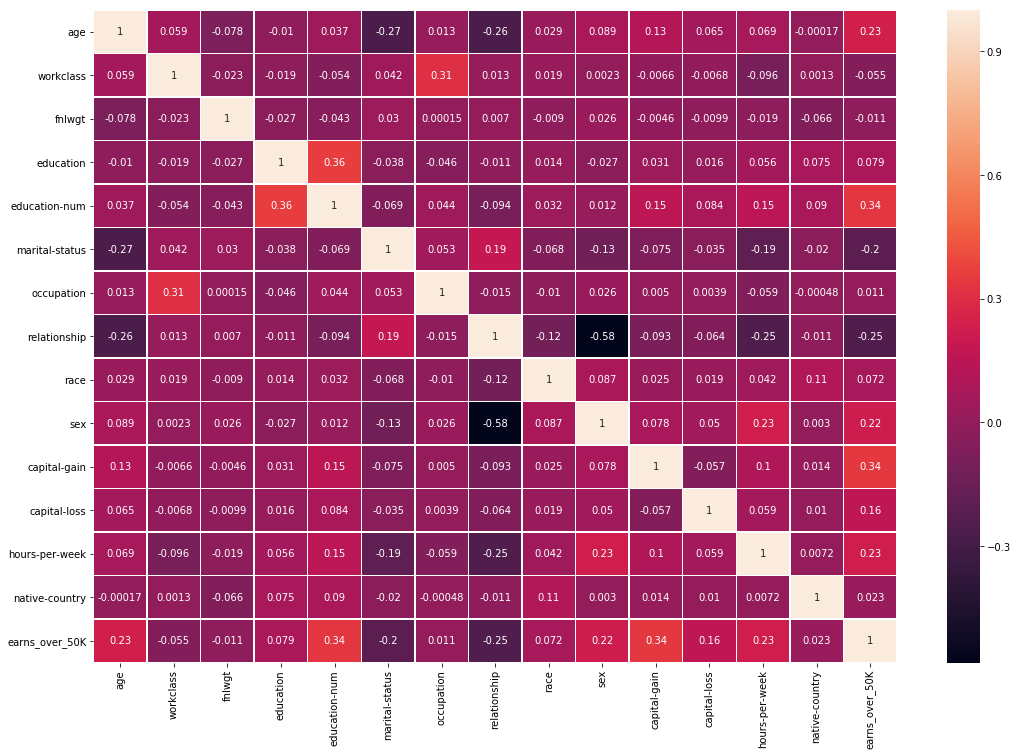

In [62]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_transformed.corr(), annot=True, linewidths=.5, ax=ax)

The table shows correlations between all features. What's interesting to see is the lack of correlation between the Ordinal encoded values and the target values. This is most likely, because the encoded categorical values have been converted to int values with no particular order. corr() assumes them to be at least ordinal if not continuous. 

In [66]:
from sklearn import tree
tcf = tree.DecisionTreeClassifier()

X, y = df_transformed.drop(['earns_over_50K'], axis=1), df_transformed.earns_over_50K

This is obviously bollocs because I am using a decision tree to predict the train set. But it's a test if the pipeline *should* work. 

In [77]:
tcf.fit(X, y)
y_pred = tcf.predict(X)
sklearn.metrics.roc_auc_score(y, y_pred)

0.9999362326233898

In [78]:
# running the current process as a child process to show Forest / TreeEnsemble performance
import subprocess
subprocess.check_output(['python', 'challenge.py'])

b'0.8769919546279237\n'

--- 
## Keras
So the tree ensemble without any prior configuration achieves a 87% ROC AUC. I'll now look into getting a nice tensorflow classifier.

Issue 1: I run python3.7 but TF needs 3.6. **That is annoying**. I found [this AUR package](https://aur.archlinux.org/packages/python36/) though which seems to allow installation of python3.6 alongside system level default 3.7. Currently building, let's see what happens

...

Okay, that worked. I got 3.6 and 3.7 installed alongside each other with `pacman` so now I can create another venv and bind that to my current dir. Gimmi a sec. Adding tensorflow and stuff. 

In [7]:
# Initial trial using a simple ANN with backprop 24/12/1 units
import subprocess
print(subprocess.check_output(['python', 'challenge.py']).decode('utf-8'))

Epoch 1/5
 - 1s - loss: 0.8951 - mean_absolute_error: 0.5088 - acc: 0.6095
Epoch 2/5
 - 1s - loss: 0.5219 - mean_absolute_error: 0.3637 - acc: 0.7523
Epoch 3/5
 - 1s - loss: 0.3903 - mean_absolute_error: 0.3311 - acc: 0.8019
Epoch 4/5
 - 1s - loss: 0.3742 - mean_absolute_error: 0.3208 - acc: 0.8120
Epoch 5/5
 - 1s - loss: 0.3722 - mean_absolute_error: 0.3253 - acc: 0.8098
0.7921724951024578



Okay, I parameterized the whole thing a bit to get ready for some hyperparameter searches. But first, let's see what's happening now, when applying the current NN. It's:
- Dense 24
- Dropout 0.2
- Dense 12, 'relu'
- Dense 1, 'hard sigmoid'

In [11]:
def call_challenge(params=[]):
    params = ['python', 'challenge.py'] + params
    return subprocess.check_output(params).decode('utf-8')

print(call_challenge())

Epoch 1/5
 - 1s - loss: 0.3985 - mean_absolute_error: 0.2463 - acc: 0.8270
Epoch 2/5
 - 1s - loss: 0.3623 - mean_absolute_error: 0.2148 - acc: 0.8498
Epoch 3/5
 - 1s - loss: 0.3510 - mean_absolute_error: 0.2149 - acc: 0.8513
Epoch 4/5
 - 1s - loss: 0.3546 - mean_absolute_error: 0.2105 - acc: 0.8530
Epoch 5/5
 - 1s - loss: 0.3558 - mean_absolute_error: 0.2107 - acc: 0.8519
0.9068123665839276



### Quick recap

Okay, got the precision up to 90. "Not bad" ... hahaha right, let's see if there is any resources online of the dataset and the typical prediction precision

Et voila: [a kaggle dataset](https://www.kaggle.com/uciml/adult-census-income/kernels).
It's hard to say who's doing best but I guess 85-90 is typical. 
[this notebook](https://www.kaggle.com/kanav0183/catboost-and-other-class-algos-with-88-accuracy) is pretty nice. I guess he did a little more exploration to begin with. Also, I forgot to check my baseline accuracy. Oh well...

Still, I wanna get this grid search working once and then I can call it a day. Let's show the current working time for the record

In [12]:
print(subprocess.check_output('timetrap').decode('utf-8'))

Timesheet: radix
    Day                Start      End        Duration   Notes
    Sun Dec 30, 2018   09:57:05 - 10:20:41   0:23:36    setting up
                       10:20:41 - 11:44:05   1:23:24    reading sklearn docs to refresh my memory
                       11:44:05 - 12:23:52   0:39:47    build a skeleton for the pipeline builder
                       13:09:23 - 14:34:00   1:24:37    fix preprocessing in code
                       15:35:05 - 17:00:09   1:25:04    some testing before moving to keras
                       17:27:00 - 18:45:28   1:18:28    grid search prep
                       18:45:53 -            0:01:13    dropout added, some preps done for grid search,
                                                        quick time check
                                             6:36:09
    ------------------------------------------------------------------------------------------------------
    Total                                    6:36:09



Cool! I might make it in a normal working day. Let's see...

### Grid Search with Keras and sklearn
Okay, I added a little utliity to the challenge.py so I can call it with a "search" parameter and then I do a grid search instead. But it's crashing, because the sample sets sometimes don't hold all the categories which leads to my input dimensions of 108 columns to be wrong (randomly)... I need to pass the df to the get_pipeline so I can determine the columns after having mapped the categories. Or I fix the categories ahead of time... I think variant number 2 is cleaner albeit more verbose

In [17]:
for i in df.columns:
    if type(df[i][1])== str:
        print(df[i].value_counts())


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                365

Some VIM Magic later:

In [19]:
print(subprocess.check_output(['cat', 'solution/categories.py']).decode('utf-8'))

"""
A collection of all the values that the categorical columns may hold. This is based on a `value_counts` output and some regex magic.
Probably a data-drive approach would be nicer. But I'm in a hurry ;-)
"""


def get_categories():
    return [["Private",
             "Self-emp-not-inc",
             "Local-gov",
             "State-gov",
             "Self-emp-inc",
             "Federal-gov",
             "Without-pay",
             "Never-worked",
             "unknown"],

            ["HS-grad",
             "Some-college",
             "Bachelors",
             "Masters",
             "Assoc-voc",
             "th",
             "Assoc-acdm",
             "th",
             "th-th",
             "Prof-school",
             "th",
             "th",
             "Doctorate",
             "th-th",
             "st-th",
             "Preschool",
             "unknown"],

            ["Married-civ-spouse",
             "Never-married",
             "Divorced",
             "Separate

This allowed me to run the `python challenge.py search` which ran a grid search on a number of settings

```
    'GRID_PARAMS': dict(
        keras__hidden_layers=[1, 2, 3],
        keras__hidden_units=[1, 6, 12, 24],
        keras__dropout_rate=[0.05, 0.1, 0.3],
        keras__optimizer=['adam', 'sgd']
    )
```

This took about 5-10 minutes and the results were... disappointing. I didn't output the right value and then the program ended... oh well, let's run it again and then output the `search.cv_results_` prop as well as the `search.best_params_` prop. But because I am impatient, I'll also download `tensorflow-gpu` and see if I can run this on my GPU a bit faster. *Danger zone*, I've never done this before on this machine, only on my desktop where the GPU was always activated, not like the laptop where the 1050 only gets activate with `optirun`

Okay, that is a little more work than I thought. TF still wants cuda 9 although I have cuda 10 (or 11?) installed. But `downgrader cuda` let's me downgrade the package to 9.0.176-4. Just gotta download 1200MB or so of binaries... no biggie :-/

Meanwhile I was wondering if I could somehow record all my actions in the terminal in this notebook. Otherwise it'sa lot of prose with very little code. And I found [this page](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) which lists a number of cool magic tools. While my cuda is downloading, I might as well... try that out while I am waiting

In [21]:
%%bash
optirun nvidia-smi

Sun Dec 30 19:56:59 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 415.25       Driver Version: 415.25       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1050    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P0    N/A /  N/A |      6MiB /  4042MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [29]:
%%bash
python challenge.py search

Epoch 1/3
 - 2s - loss: 0.6098 - mean_absolute_error: 0.4460 - acc: 0.7412
Epoch 1/3
 - 2s - loss: 0.5858 - mean_absolute_error: 0.4330 - acc: 0.7832
Epoch 1/3
 - 2s - loss: 0.5095 - mean_absolute_error: 0.3550 - acc: 0.7611
Epoch 1/3
 - 2s - loss: 0.6051 - mean_absolute_error: 0.4441 - acc: 0.8203
Epoch 1/3
 - 2s - loss: 0.4023 - mean_absolute_error: 0.2578 - acc: 0.8114
Epoch 1/3
 - 2s - loss: 0.6070 - mean_absolute_error: 0.4474 - acc: 0.8092
Epoch 1/3
 - 2s - loss: 0.3886 - mean_absolute_error: 0.2554 - acc: 0.8274
Epoch 1/3
 - 2s - loss: 0.3775 - mean_absolute_error: 0.2543 - acc: 0.8308
Epoch 2/3
 - 2s - loss: 0.4982 - mean_absolute_error: 0.3669 - acc: 0.7904
Epoch 2/3
 - 2s - loss: 0.4088 - mean_absolute_error: 0.2698 - acc: 0.7611
Epoch 2/3
 - 2s - loss: 0.4395 - mean_absolute_error: 0.3230 - acc: 0.8307
Epoch 2/3
 - 2s - loss: 0.4947 - mean_absolute_error: 0.3665 - acc: 0.8497
Epoch 2/3
 - 2s - loss: 0.3860 - mean_absolute_error: 0.2418 - acc: 0.8409
Epoch 2/3
 - 2s - loss: 0

Using TensorFlow backend.
/home/pascalwhoop/.virtualenvs/radix_challenge_3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
2018-12-30 20:06:25.369043: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-30 20:06:25.400104: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-30 20:06:25.454544: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-30 20:06:25.529241: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary

It's hard to scroll through all this but the following line is the important part:
```
{'keras__dropout_rate': 0.1, 'keras__hidden_layers': 3, 'keras__hidden_units': 24, 'keras__optimizer': 'adam'}
```
this is the "best" performance. 

as a comparison, all the runs warranted this
```
'mean_test_score': array([0.84994318, 0.78375971, 0.85061884, 0.84033046, 0.85154019,
       0.81993796, 0.84951322, 0.64515832, 0.82098216, 0.81241362,
       0.8502503 , 0.80366082, 0.84911397, 0.84042259, 0.8528915 ,
       0.84340162, 0.75919044, 0.75919044, 0.85111022, 0.81158441,
       0.85074168, 0.82423758, 0.8526458 , 0.62528792, 0.84506004,
       0.58425724, 0.8502503 , 0.81450201, 0.85329075, 0.63935383,
       0.85261509, 0.65323547, 0.81404134, 0.75919044, 0.8507724 ,
       0.81222935, 0.85144805, 0.83894844, 0.85147876, 0.63308866,
       0.75919044, 0.7816099 , 0.85095667, 0.76686834, 0.85295292,
       0.82767728, 0.85464206, 0.83796566, 0.84266454, 0.78683087,
       0.84911397, 0.83581585, 0.85058813, 0.83231473, 0.85083382,
       0.83569301, 0.82021437, 0.79214398, 0.85000461, 0.78216271,
       0.85209299, 0.64024446, 0.85172446, 0.63321151, 0.75919044,
       0.78790578, 0.85187801, 0.83219189, 0.85200086, 0.83639937,
       0.85163232, 0.84162034]),
```

Let's set that to the default params and see what we get

In [30]:
%%bash
python challenge.py

Epoch 1/3
 - 1s - loss: 0.3851 - mean_absolute_error: 0.2308 - acc: 0.8342
Epoch 2/3
 - 1s - loss: 0.3593 - mean_absolute_error: 0.2205 - acc: 0.8460
Epoch 3/3
 - 1s - loss: 0.3580 - mean_absolute_error: 0.2272 - acc: 0.8505
0.9033969046739353


2018-12-30 20:17:05.794205: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Using TensorFlow backend.
/home/pascalwhoop/.virtualenvs/radix_challenge_3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pascalwhoop/.virtualenvs/radix_challenge_3.6/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/pascalwhoop/.virtualenvs/radix_challenge_3.6/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


It seems I'm stuck at around 0.90 . That's fine though... I'm hungry anyways and almost at the 8h mark. GPU accelerated TF can wait until I have a cluster at my disposal again...

## Recap

- I built the pipeline, starting with a tree classifier, then replacing it with a forest and then I used a NN with keras as a high level abstraction
- in Keras, I managed to get up to 0.90, in comparison to .87 with the forest
- changing the epochs to more than 3 didn't warrant any improvements
- tuning the hyperparameters with gridsearch led to the above "best" performance. However, I still don't get past the 0.90 mark.
- all NaN were masked with "unknown" which is its own category
    - future improvement: write a predictor for the missing values, predict them first, then fill them and then predict the actual target Y
- `pipeline.dump` can be created with `joblib.dump()` although I don't get if I don't see if it's actually not what you are looking for or if it's really this simple (just 

---
## Sources and Links

#### Pipeline building
- [pipeline api](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators)
- [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)
- [column transformer](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62)


#### Hyperparam improvement and keras integration
- [grid search with keras](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)
- [grid search SO](https://stackoverflow.com/questions/41484580/gridsearch-with-keras-neural-networks)
- [hyperparam tuning index](https://medium.com/@mikkokotila/a-comprehensive-list-of-hyperparameter-optimization-tuning-solutions-88e067f19d9)